In [0]:
# EEE- 598 COMPUTATIONAL IMAGING & UNDERSTANDING 
# ASSIGNMENT 2 : IMAGE PROCESSING USING PYTHON AND OPENCV
# Hemanth Balaji Dandi -> # 1213076538

In [0]:
import numpy as np
import cv2 
import random 
from matplotlib import pyplot as plt
import os
import time

## THIS PART OF THE CODE LETS YOU USE THE FILES FROM YOUR GOOGLE DRIVE ACCOUNT
## YOU NEED NOT USE THIS IF YOU ARE NOT USING GOOGLE COLABORATORY


## ASSIGNMENT PART 1
## (a) Open this file on Google Colab
## (b) Make a folder on Google Drive in which you can store images. 
# Upload the "cameraman.tif" provided to you
## (c) The last part of the URL will serve as the "drive_id" in the line below
## If you are unsure, you can read further here 
## : https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data
##   -from-my-google-drive

folder_id = '1e9y3o1wN1XJb2FxL5dc63ZZj6LGls_Hd' # Enter the last part of the 
                                          # URL of the Google Drive folder here

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': '\'' + folder_id + "\' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)
  
os.chdir(local_download_path)

title: meh.png, id: 11PLeOfIG4WHjeFd0NuO1uXzho72Hh02N
downloading to /root/data/meh.png
title: cameraman.tif, id: 1Qr4x9TAkQ87cUNXwbwGPjX5r-enl4aI4
downloading to /root/data/cameraman.tif


([], <a list of 0 Text yticklabel objects>)

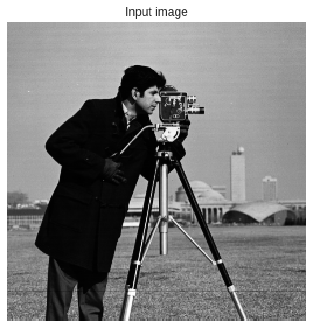

In [0]:
# Read an image
img = cv2.imread('cameraman.tif', 0) # 0 flag indicates that the image is 
                                     # read as grayscale
plt.imshow(img, cmap='gray')
plt.title('Input image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Additional info: As mentioned in class, OpenCV loads images in the BGR format.
# Additional info: RGB is only one of several color spaces. You can find out 
#                  about other popular color spaces,
# their applications, and how to use them in OpenCV here: 
# https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/

(None,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

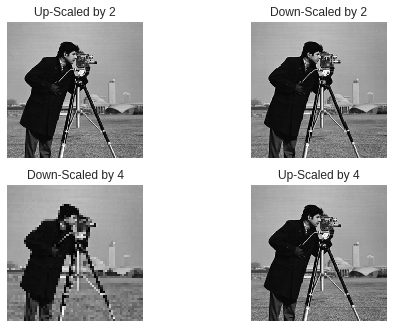

In [0]:
##Geometric Scalings
# Assignment Part 2
# Image Scaling

height, width = img.shape

# (a) Experiment with other scaling factors and output the resized images
# Up-Scaled to Double of the original image
img_resized_doubled = cv2.resize(img, (2*width, 2*height), 
                                 interpolation=cv2.INTER_CUBIC) 
# Down-Scaled the original image to half
img_resized_halved = cv2.resize(img, (int(0.5*width), int(0.5*height)), 
                                interpolation=cv2.INTER_CUBIC) 
# Down-Scaled the original image to quarter
img_resized_quarter = cv2.resize(img, (int(0.25*width), int(0.25*height)), 
                                 interpolation=cv2.INTER_CUBIC) 
# Up-Scaled to Four times that of the original image
img_resized_up_4 = cv2.resize(img, (4*width, 4*height), 
                              interpolation=cv2.INTER_CUBIC) 


plt.subplot(2,2,1)
plt.imshow(img_resized_doubled,'gray')
plt.title('Up-Scaled by 2')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(img_resized_halved,'gray')
plt.title('Down-Scaled by 2')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(img_resized_quarter,'gray')
plt.title('Down-Scaled by 4')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(img_resized_doubled,'gray')
plt.title('Up-Scaled by 4')
plt.grid(False), plt.xticks([]), plt.yticks([])


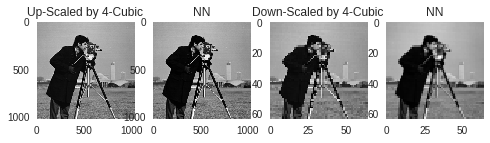

In [0]:
# (b) Experiment with other interpolation functions and report the results
# Comparing 3 Interpolation functions -> (a) Cubic-Spline Interpolation 
#                             (b) Inter-Area or Nearest Neigbours Interpolation  
# Upscaling by 4 times using Cubic Interpolation
img_resized_cub_4 = cv2.resize(img, (4*width, 4*height), 
                               interpolation=cv2.INTER_CUBIC) 
# Upscaling by 4 times using Nearest Neigbours
img_resized_NN_4 = cv2.resize(img, (4*width, 4*height), 
                              interpolation=cv2.INTER_AREA)
# Downscaling by 4 times using Cubic Interpolation
img_down_resized_cub_4 = cv2.resize(img, (int(0.25*width), int(0.25*height)), 
                                    interpolation=cv2.INTER_CUBIC) 
# Saving the downsampled image
cv2.imwrite('cameraman_4xdown_cub.png', img_down_resized_cub_4) 
# Downscaling by 4 times using Nearest Neigbours
img_down_resized_NN_4 = cv2.resize(img, (int(0.25*width), int(0.25*height)), 
                                   interpolation=cv2.INTER_AREA) 
# Saving the downsampled image
cv2.imwrite('cameraman_4xdown_NN.png', img_down_resized_NN_4) 

plt.subplot(1,4,1)
plt.imshow(img_resized_cub_4,'gray')
plt.grid(False)

plt.title('Up-Scaled by 4-Cubic')
plt.subplot(1,4,2)
plt.imshow(img_resized_NN_4,'gray')
plt.title('NN')
plt.grid(False)

plt.subplot(1,4,3)
plt.imshow(img_down_resized_cub_4,'gray')
plt.title('Down-Scaled by 4-Cubic')
plt.grid(False)

plt.subplot(1,4,4)
plt.imshow(img_down_resized_NN_4,'gray')
plt.title('NN')
plt.grid(False)


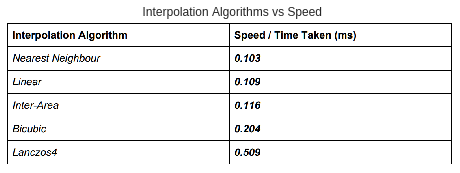

In [0]:
# (c) When increasing the image size, is the choice of the interpolation
#     important? If so, why?
# Ans ->  We can understand which interpolation scheme matters based on two 
#        factors -> 
# (a) Based on how the fine image corresponds to the Original image (After 
#     upsampling and downsampling by the same factor to obtain the initial 
#     dimensions of the original image and compare either through Histogram or 
#    through visual means by zooming at different parts of the image to see if 
#    there are blocky parts (like in Inter_Area of Nearest Neighbours) or are 
#     blurred than the original (like sometimes in Linear or in Cubic) or if 
#     some information is lost)
# (b) If the final image is the same between the Interpolation schemes, we then
#     check the speed of computation of each Interpolation method (If one is 
#     doing resizing with less images, then Lanczos4 will be the ideal case as 
#     the algorithm is much better than the rest eventhough it takes time to 
#    execute). However, if one is dealing with a dataset of, say 10,000 images,
#    eventhough Lancz0s4 performs better, we might use Cubic or linear as 
#     eventhough they are little less competent than Lanczos4, their execution
#     time is much faster, and helps with computation
#     So, in conclusion, when you increase the size of the image, the 
#      Interpolation method matters, and depends upon the situation.
# Below is a table which gives the Speed or time-taken for each algorithm on 
# upsampling the original image by 4 times.
# As expected, Lanczos4 takes more time than the rest of the methods.

height2, width2 = img.shape

t0 = time.time();
#print('Initial', t0)
img_cub = cv2.resize(img, (4*width2, 4*height2), interpolation=cv2.INTER_CUBIC) # Up-Scaled to 4 times of the original image
time1 = time.time();
#print('Cubic', time1-t0)
img_Area = cv2.resize(img, (4*width2, 4*height2), interpolation=cv2.INTER_AREA) # Up-Scaled to 4 times of the original image
time2 = time.time();
#print('Inter-Area', time2-time1)
img_NN = cv2.resize(img, (4*width2, 4*height2), interpolation=cv2.INTER_NEAREST) # Up-Scaled to 4 times of the original image
time3 = time.time();
#print('Nearest Neighbour', time3-time2)
img_LANC = cv2.resize(img, (4*width2, 4*height2), interpolation=cv2.INTER_LANCZOS4) # Up-Scaled to 4 times of the original image
time4 = time.time();
#print('Lanczos4', time4-time3)
img_Linear = cv2.resize(img, (4*width2, 4*height2), interpolation=cv2.INTER_LINEAR) # Up-Scaled to 4 times of the original image
time5 = time.time();
#print('Linear', time5-time4)

img2 = cv2.imread('meh.png') # 0 flag indicates that the image is 
                                     # read as grayscale
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title(' Interpolation Algorithms vs Speed')

plt.imshow(img2)

([], <a list of 0 Text yticklabel objects>)

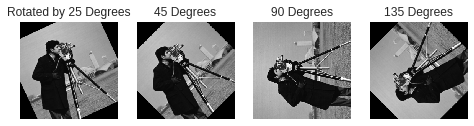

In [0]:
# Assignment Part 3
# Image Rotation

# (a) Rotate the image through 25, 45 and 135 degrees, observe the outputs and 
#     report the results.
M_25 = cv2.getRotationMatrix2D((height/2,width/2),25,1) # Create a rotation 
                                         # matrix through rotating by 25 degrees
img_rotated_25 = cv2.warpAffine(img,M_25,(width,height))   # Rotate the image

M_45 = cv2.getRotationMatrix2D((height/2,width/2),45,1) # Create a rotation 
                                        # matrix through rotating by 45 degrees
img_rotated_45 = cv2.warpAffine(img,M_45,(width,height))   # Rotate the image

M_90 = cv2.getRotationMatrix2D((height/2,width/2),90,1) # Create a rotation 
                                        # matrix through rotating by 90 degrees
img_rotated_90 = cv2.warpAffine(img,M_90,(width,height))   # Rotate the image

M_135 = cv2.getRotationMatrix2D((height/2,width/2),135,1) # Create a rotation 
                                      # matrix through rotating by 135 degrees
img_rotated_135 = cv2.warpAffine(img,M_135,(width,height))   # Rotate the image

plt.subplot(1,4,1)
plt.imshow(img_rotated_25,'gray')
plt.title('Rotated by 25 Degrees')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.imshow(img_rotated_45,'gray')
plt.title('45 Degrees')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.imshow(img_rotated_90,'gray')
plt.title('90 Degrees')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.imshow(img_rotated_135,'gray')
plt.title('135 Degrees')
plt.grid(False)
plt.xticks([])
plt.yticks([])

# (b) Which interpolation function is being used currently (by default)?
# Ans -> Bilinear Interpolation is used by default.

# (c) Why do we need to do interpolation while rotating an image?
# Ans -> We need to perform interpolation because, when rotating an image, 
# which is simply multiplying the coordinates with a component of angular theta, 
# which rounds up or down the final value, leaving pockets of space in the 
# rotated image. 
# So, in-order to fill those pockets, we use interpolation.


([], <a list of 0 Text yticklabel objects>)

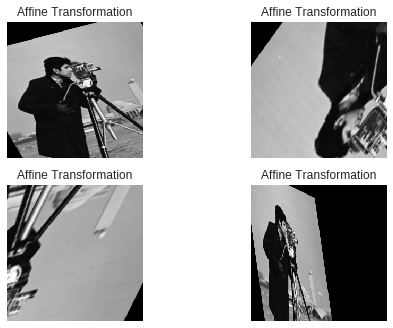

In [0]:
# Assignment Part 4
# Affine Transformation & Perspective Transform
# Affine transforms are a more general class of transforms including rotation, 
# translation, scaling, and shearing

# (a) Experiment with other values for 'pts1' and 'pts2' and report the results. 
 # Read the documentation and try to understand the working of the 
 # cv2.warpAffine function

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2) # Create the affine transformation matrix
img_affine = cv2.warpAffine(img,M,(width,height)) # Compute the affine transform

pts3 = np.float32([[10,40],[80,100],[100,30]])
pts4 = np.float32([[10,100],[200,50],[100,250]])

M2 = cv2.getAffineTransform(pts3,pts4)# Create the affine transformation matrix
img_affine2 = cv2.warpAffine(img,M2,(width,height))#Compute the affine transform

pts5 = np.float32([[125,125],[200,125],[200,50]])
pts6 = np.float32([[10,100],[200,50],[100,250]])

M3 = cv2.getAffineTransform(pts5,pts6) # Create the affine transformation matrix
img_affine3 = cv2.warpAffine(img,M3,(width,height))#Compute the affine transform

pts7 = np.float32([[50,50],[200,50],[50,200]])
pts8 = np.float32([[20,40],[100,80],[50,250]])

M4 = cv2.getAffineTransform(pts7,pts8) # Create the affine transformation matrix
img_affine4 = cv2.warpAffine(img,M4,(width,height))#Compute the affine transform


plt.subplot(2,2,1)
plt.imshow(img_affine,'gray')
plt.title('Affine Transformation')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(img_affine2,'gray')
plt.title('Affine Transformation')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(img_affine3,'gray')
plt.title('Affine Transformation')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(img_affine4,'gray')
plt.title('Affine Transformation')
plt.grid(False)
plt.xticks([])
plt.yticks([])


In [0]:
# (b) On an image of your choice, show an example of the perspective transform 
# using built-in functions cv2.getPerspectiveTransform and cv2.warpPerspective
ptsP1 = np.float32([[50,50],[200,50],[50,200],[200,200]])
ptsP2 = np.float32([[10,100],[200,50],[100,250],[150,200]])

# Create the Perspectivetransformation matrix
P = cv2.getPerspectiveTransform(ptsP1,ptsP2) 
img_persp = cv2.warpPerspective(img,P,(width,height)) # Compute the 
                                                   # Warp Perspective transform
img3 = cv2.imread('2.jpeg',0)
height3, width3 = img.shape
gray2 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

img_persp2 = cv2.warpPerspective(gray2,P,(width3,height3)) # Compute the 
                                                   # Warp Perspective transform
plt.subplot(1,2,1)
plt.imshow(img_persp, 'gray')
plt.title(' Perspective Transformation ')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(img_persp2)
plt.title(' Perspective Transformation')
plt.grid(False)
plt.xticks([])
plt.yticks([])



error: ignored

([], <a list of 0 Text yticklabel objects>)

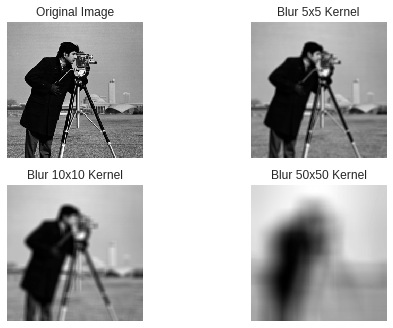

In [0]:
# Assignment Part 5
# Smoothing

# Averaging with a box filter

kernel = np.ones((5,5),np.float32)/25 # The filter/kernel size is 5x5
img_smooth_average = cv2.filter2D(img, -1, kernel)

plt.imshow(img_smooth_average, 'gray')
plt.title('Image smoothed with box filter')

# (a) What happens when the filter/kernel size is increased? Remember to 
#     normalize the co-efficients. Show your experimental results.
# Ans -> As we increase the blur kernel size, the image becomes more and 
#        more blurred, 
#        as every pixel is averaged out with more part of the image every 
#        time the kernel-size increases.
kernel2 = np.ones((10,10),np.float32)/100 # The filter/kernel size is 10x10
img_smooth_average2 = cv2.filter2D(img, -1, kernel2)
kernel3 = np.ones((50,50),np.float32)/2500 # The filter/kernel size is 50x50
img_smooth_average3 = cv2.filter2D(img, -1, kernel3)


plt.subplot(2,2,1)
plt.imshow(img,'gray')
plt.title('Original Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(img_smooth_average,'gray')
plt.title('Blur 5x5 Kernel')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(img_smooth_average2,'gray')
plt.title('Blur 10x10 Kernel')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(img_smooth_average3,'gray')
plt.title('Blur 50x50 Kernel')
plt.grid(False)
plt.xticks([])
plt.yticks([])





([], <a list of 0 Text yticklabel objects>)

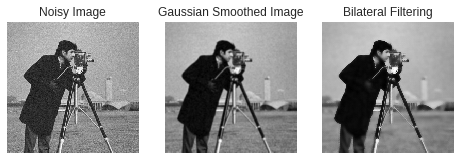

In [0]:
# Gaussian smoothing
sigma = 10.0
 # Create a noisy image by adding Gaussian noise
img_noisy = img + sigma*np.random.randn(height, width)                      
# Create a smoothed version of the noisy image by convolving with a 
# Gaussian filter
img_gaussian = cv2.GaussianBlur(img_noisy, (5,5) , 0)                        
img_bilateral = cv2.bilateralFilter(img_noisy.astype(np.float32), 9, 75, 75) 
# Smoothing using a bilateral filter


plt.subplot(1,3,1), plt.imshow(img_noisy, cmap='gray')
plt.title('Noisy Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2), plt.imshow(img_gaussian, cmap='gray')
plt.title('Gaussian Smoothed Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3), plt.imshow(img_bilateral, cmap='gray')
plt.title('Bilateral Filtering')
plt.grid(False)
plt.xticks([])
plt.yticks([])



# As we can see, smoothing with a Gaussian filter can help in image denoising, 
# but it also blurs the edges, 
# which is not desirable. A better approach is to use a bilateral filter. 

# (a) Read about bilateral filtering and briefly explain how a bilateral filter 
# can preserve edges while removing the noise. 
#  The first 8-10 pages of this document provide a good reference: 
#  https://people.csail.mit.edu/sparis/bf_course/course_notes.pdf
# Ans-> In Bilateral Filter, according to equation, 2 Gaussian kernels are used, 
#      one for proximity and the other for pixel intensities.
# Therefore, when edges arrive in the image, that would mean there will be large 
# gradient between pixel intensity, hence that part wouldn't be blurred that 
# much, whereas when the gradient is small, it is blurred.
# This is what makes the Bilateral filter powerful,a paramter that takes into 
# account pixel intensity gradients along with pixel proximities. 
# Since noise occurs, eventhough the pixel intensity gradient between the 
# non-noise pixel and the noisy pixel is high, but the proximity is less, 
# hence it helps to get rid of the noisy pixel by averaging it out with similar 
# pixels. 
# In other words, in Bilateral filter, the pixels closest to the 'center' pixel
# gets weighted more than the ones farther, and the ones having large intensity
# gradient drop will be weighted less, hence edges are retained.


(Text(0.5,1,u'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

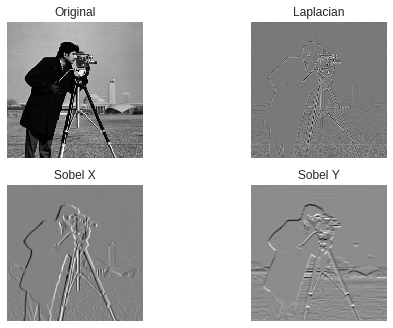

In [0]:







## GRADIENTS

img = cv2.imread('cameraman.tif', 0) # 0 flag indicates that the image is 
                                     # read as grayscale
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1,0,ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])


([], <a list of 0 Text yticklabel objects>)

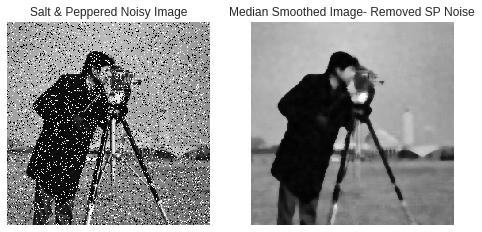

In [0]:
## ASSIGNMENT PART 7
# Salt-and-pepper noise and Median Filtering

# (a) What is salt-and-pepper noise?
# Ans -> Salt and Pepper noise occurs usually when there is data transfer 
#        from analog to digital medium.They appear as high and low dots spread 
#        around the image. 
#        'Salt' refers to noisy very-high intensity pixels and 'Pepper' efers 
#         to noisy very-low intensity pixels

# (b) Add salt-and-pepper noise to your image and display the result

def salt_pepper(image):

	output = image
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			rdn = random.random()
			if rdn < 0.08:
				output[i][j] = 0
			elif rdn > 0.92:
				output[i][j] = 255
			
	return output

saltpep_noisyimg = salt_pepper(img)

#plt.imshow(saltpep_noisyimg,'gray')
#plt.show()

# We can denoise the image with salt-and-pepper noise using "median filtering"

# (c) Apply in-built function cv2.medianBlur on the noisy image, observe and 
#     display the output
img_median = cv2.medianBlur(np.uint8(img_noisy),7)


plt.subplot(1,2,1), plt.imshow(saltpep_noisyimg, cmap='gray')
plt.title('Salt & Peppered Noisy Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2), plt.imshow(img_median, cmap='gray')
plt.title('Median Smoothed Image- Removed SP Noise')
plt.grid(False)
plt.xticks([])
plt.yticks([])



(Text(0.5,1,u'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

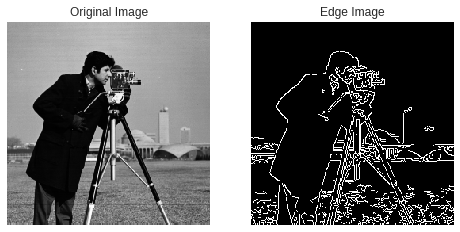

In [0]:
# Canny edge detection

img = cv2.imread('cameraman.tif', 0) # 0 flag indicates that the image is read 
                                     # as grayscale
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
